In [81]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Load the dataset

In [82]:
#assign url as string where we will pull data from
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"

In [83]:
park_data = pd.read_csv(url, dtype=None)

In [84]:
park_data.head()

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5   ...     Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317   ...           0.230       0.01438   
1     0.000017     0.00132      0.00150   ...           0.179       0.00994   
2     0.000025     0.00205      0.00208   ...           0.181       0.00734   
3     0.000027     0.00191      0.00264   ...           0.327       0.01106   
4     0.000020     0.00093      0.00130   ...           0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1       0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2       0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3       0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4       0.00929        0.01819      0.02036  0.011625  26.126  0.47188   

       DFA      PPE  
0  0.54842  0.16006  
1  0.56477  0.10810  
2  0.54405  0.21014  
3  0.57794  0.33277  
4  0.56122  0.19361  

[5 rows x 22 columns]

In [85]:
park_data.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

### Create the X-matrix (one-hot encoding categorical factors).

In [86]:
X = park_data.as_matrix()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Scale the X-matrix.

In [88]:
X = StandardScaler().fit_transform(X)

### Create the principal components and do a simple plot of the explained variance.

In [99]:
#define the first four principal components
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(data = pca_result , columns = ['pc1', 'pc2', 'pc3', 'pc4'])

print(pca_df.head())
print(pca_df.shape)

        pc1       pc2       pc3       pc4
0 -0.979513 -0.637421  0.079761  0.282133
1 -2.595821 -0.871639  0.570724 -0.044726
2 -1.932536 -0.966813 -0.160528 -0.022605
3 -1.017126 -1.009619 -0.294715 -0.502373
4 -2.463243 -1.143176  0.077811 -0.281426
(5875, 4)


/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


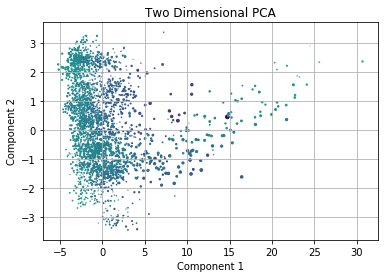

In [100]:
#create plot of pca components
plt.scatter(pca_df.loc[:, 'pc1'], pca_df.loc[:, 'pc2'], pca_df.loc[:, 'pc3'], pca_df.loc[:, 'pc4'])
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('Two Dimensional PCA')
plt.grid()

In [101]:
#calculate variance of pca components
print(pca.explained_variance_)
print(pca.components_)

[11.330984    2.23738274  1.70152856  1.4824044 ]
[[ 0.05453356  0.02732169  0.01062195 -0.00958279  0.04122787  0.03942757
   0.26541405  0.24792577  0.2574593   0.263551    0.2574608   0.27760082
   0.27794643  0.26797626  0.27350168  0.26131711  0.26797584  0.25740855
  -0.25667306  0.16763772  0.06889212  0.2299154 ]
 [-0.21521058 -0.31914181  0.03496777 -0.07599622 -0.61299563 -0.62157734
   0.08688063  0.08063416  0.09999357  0.08755714  0.09998511 -0.01569231
  -0.02066594 -0.00915807 -0.01004341 -0.05319899 -0.00915826  0.0461827
   0.0608371  -0.09290582  0.14715401 -0.0332978 ]
 [-0.00978598  0.0465454   0.27395168 -0.06501377 -0.11878193 -0.13758259
  -0.23291473 -0.31421919 -0.23365373 -0.15630484 -0.23365996  0.24540167
   0.23369929  0.26762953  0.25990969  0.22316102  0.26763081  0.05678998
   0.00634386 -0.14792809 -0.35244626 -0.27204528]
 [ 0.30875221 -0.14686554  0.57645171  0.01068691  0.10182431  0.06062813
   0.20104678 -0.04473677  0.23363427  0.23041833  0.23362

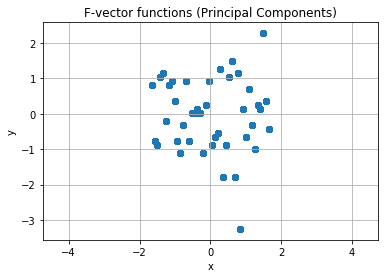

In [102]:
exp_var = pca.explained_variance_
components = pca.components_

# Vector to plot
#    = plot scale * component direction * component length
v1 = 2 * components[0] * np.sqrt(exp_var[0])
v2 = 2 * components[1] * np.sqrt(exp_var[1])
c = (0, 0) # Center is at 0,0 because of our standardization

plt.scatter(X[:, 0], X[:, 1], alpha=0.5)

plt.axis('equal')
plt.grid()
plt.title('F-vector functions (Principal Components)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()